In [11]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [20]:
# Inlezen van CSV-bestand
dataPositions = pd.read_csv('data/positions_xyz_128px_full.csv')
dataCoordinates = pd.read_csv('data/red_ball_coordinates_128px_full.csv')

# X zijn de 14 inputs, en y zijn de 3 outputs
y = dataPositions.values
X = dataCoordinates.values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
# see the nan of y

Shape of X: (25357, 14)
Shape of y: (25357, 3)


In [21]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
dfX = imputer.fit_transform(X)

In [22]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(dfX, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

In [23]:
model = MLPRegressor(hidden_layer_sizes=(100, ), max_iter=28000, random_state=42)

model.fit(X_train_scaled, y_train_scaled)

MLPRegressor(max_iter=28000, random_state=42)

In [24]:
y_val_pred_scaled = model.predict(X_val_scaled)
y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled)

mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"MSE on validation set: {mse_val}")
print(f"MAE on validation set: {mae_val}")
print(f"R2-score on validation set: {r2_val}")

MSE on validation set: 6.338974380674187
MAE on validation set: 1.536543148764369
R2-score on validation set: 0.7141418696723026


In [25]:
y_test_pred_scaled = model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MSE on validation set: {mse_test}")
print(f"MAE on validation set: {mae_test}")
print(f"R2-score on validation set: {r2_test}")

MSE on validation set: 6.423456527146253
MAE on validation set: 1.5308079910825656
R2-score on validation set: 0.7138094339988598


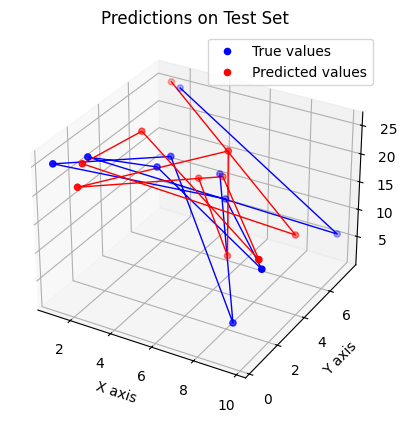

In [26]:
from plot_maker_gaussian_process import plot_maker_3d

plot_maker_3d(y_test, y_test_pred, "Predictions on Test Set")